<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


Ignoring the unnamed all variables are floating integers with no nulls

In [5]:
'''
The following describes the dataset variables:
·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's
'''

"\nThe following describes the dataset variables:\n·      CRIM - per capita crime rate by town\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n·      INDUS - proportion of non-retail business acres per town.\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n·      NOX - nitric oxides concentration (parts per 10 million)\n·      RM - average number of rooms per dwelling\n·      AGE - proportion of owner-occupied units built prior to 1940\n·      DIS - weighted distances to five Boston employment centres\n·      RAD - index of accessibility to radial highways\n·      TAX - full-value property-tax rate per $10,000\n·      PTRATIO - pupil-teacher ratio by town\n·      LSTAT - % lower status of the population\n·      MEDV - Median value of owner-occupied homes in $1000's\n"

In [6]:
boston_df.shape

(506, 14)

There are 506 records with 14 data attributes 

In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


* Shows the key staistical values (mean, standard devaition, median, min, max,  25% quartile etc )  for all variables
* Example The mean for Median value of owner-occupied homes in 1000s is around 22 while median is around 21

In [8]:
# checking for duplicate values in the data
boston_df.duplicated().sum()

0

No dupliactes in the data set

In [9]:
#No of unique values for each 
boston_df.nunique()

Unnamed: 0    506
CRIM          504
ZN             26
INDUS          76
CHAS            2
NOX            81
RM            446
AGE           356
DIS           412
RAD             9
TAX            66
PTRATIO        46
LSTAT         455
MEDV          229
dtype: int64

# For the "Median value of owner-occupied homes" provide a boxplot


Text(0.5, 0, 'Median value of owner-occupied homes - MEDV')

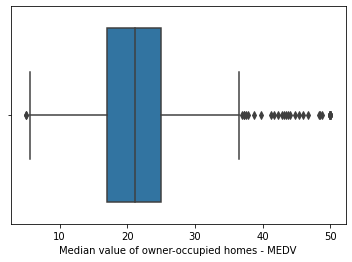

In [10]:
ax = sns.boxplot(x='MEDV',  data=boston_df)
ax.set_xlabel('Median value of owner-occupied homes - MEDV')

* Median is around 21 and many outliers on the right. Right skewed data implying the value of some homes are much higher than others

# Provide a bar plot for the Charles river variable

In [11]:
boston_df['CHAS'].value_counts(normalize=True) * 100

0.0    93.083004
1.0     6.916996
Name: CHAS, dtype: float64

In [12]:
boston_df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

Text(0.5, 0, 'Charles River Variable - CHAS')

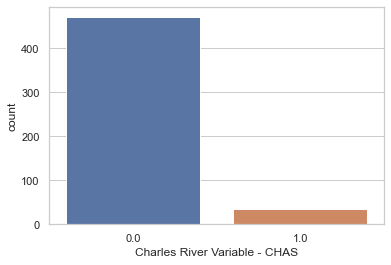

In [13]:
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df)
ax.set_xlabel('Charles River Variable - CHAS')

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* Unbalanced data set with only 6.9% have houses bounded by Charles river
* Also this should be a categorical variable 

In [14]:
# converting CHAS to String 
boston_df['CHAS']=boston_df['CHAS'].astype('str')

In [15]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    object 
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 55.5+ KB


# Provide a boxplot for the MEDV variable vs the AGE variable. 

In [16]:
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'


boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Text(0, 0.5, 'Median value of owner-occupied homes - MEDV')

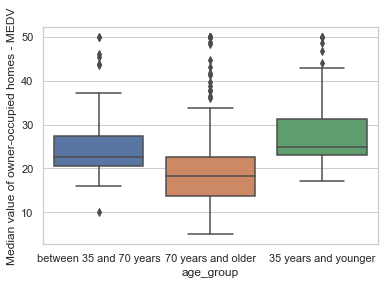

In [17]:
ax = sns.boxplot(y='MEDV', x='age_group', data=boston_df)
ax.set_ylabel('Median value of owner-occupied homes - MEDV')

* People with ages > 70 have a  lower median value comapred to the ones with age < 35 
* so there is corelation between age and median value of homes 
* all age groups have outliers - so data is right skewed 

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail 

Text(0.5, 0, 'nitric oxides concentration - NOS')

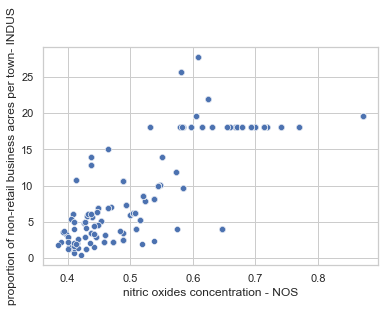

In [18]:
#business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_ylabel('proportion of non-retail business acres per town- INDUS')
ax.set_xlabel('nitric oxides concentration - NOS')

* the data is upward sloping to the right and shows a corelation between the 2 variables. 
* when nitric oxides concentration > 0.6 then the corelation is not strong 

[Text(0.5, 0, 'pupil to teacher ratio'), Text(0, 0.5, 'Count')]

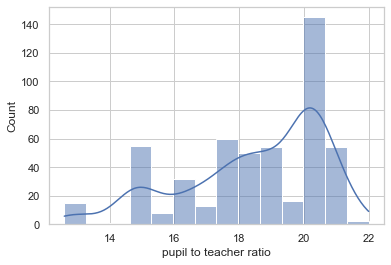

In [19]:
#Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(boston_df['PTRATIO'], kde = True)
ax.set(xlabel='pupil to teacher ratio', ylabel='Count')

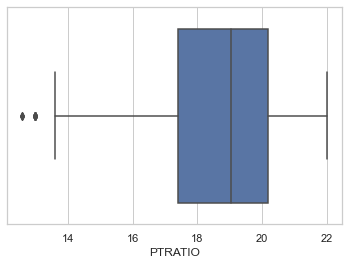

In [20]:
ax = sns.boxplot(x='PTRATIO',  data=boston_df)

* Mean around 18.5 and median around 19 - seems to be more of a normal distribution 
* Most teachers have around 17 to 20 students 

# Is there a significant difference in median value of houses bounded by the Charles river or not? 
(T-test for independent samples)

#T-Test: Does bounding by Charles River affect median value of houses?
#State the hypothesis

* 𝐻0:µ1=µ2
  ("Bounding does not impact the median value of houses")
* 𝐻1:µ1≠µ2
  ("Bounding does impact the median value of houses")


C:\Users\DHONEY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

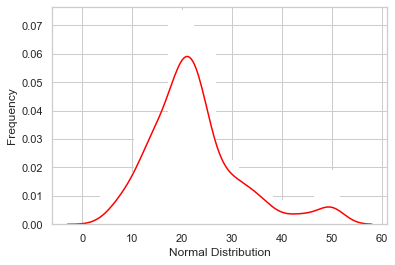

In [21]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [22]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == '1.0']['MEDV'],
                   boston_df[boston_df['CHAS'] == '0.0']['MEDV'], center='median')

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Since the p-value is less than 0.05 reject the null hypothesis of equal variance based on bounding by the Charles river

In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '1.0']['MEDV'],
                   boston_df[boston_df['CHAS'] == '0.0']['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

* Conclusion: Since the p-value is less than alpha value 0.05, we reject the null hypothesis that bounding does not impact the median values of houses 
* The median values of houses is impacted by bounding of charles river

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal ie age does not impact the median value)
* $H_1:$ At least one of the means differ


In [24]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

since the p-value is greater than 0.05, the variance are equal

In [25]:
#First, separate the three samples (one for each age group) into a variable each.
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [26]:
#Now, run a one-way ANOVA.
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ and age does impact the median values of homes.


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

* 𝐻0:
  Nitric Oxide concentration is not correlated with proportion of non-retail business acres per town
* 𝐻1:
  Nitric Oxide concentration is not correlated with proportion of non-retail business acres per town

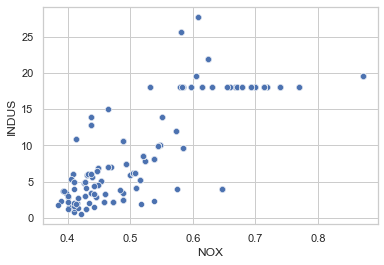

In [27]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.763651446920915, 7.913361061239593e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  NOX (Nitric Oxide concentration) and INDUS (proportion of non-retail business acres per town) score.


# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

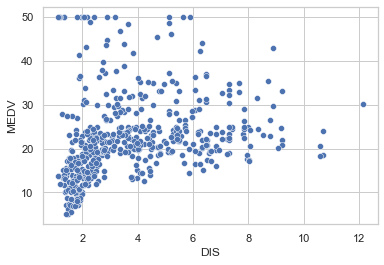

In [29]:
ax = sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

In [30]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        10:20:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between weighted distance to the five Boston employment centres on the median value of owner occupied homes
